In [1]:
# Importing the necessary packages and modules.
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import seaborn as sns

In [2]:
# Assigning the reading file and directory, and the output directory to variables.
input_file = "./New_Datasets/Dataset_New_Columns_All_Countries_With_Region.csv"
path_output = "./New_Datasets/"
# Setting the default delimiter for output data files.
delimiter_csv_files = ";"

In [3]:
# Setting the default layout of the seaborn graphs.
sns.set_style(style="whitegrid")

In [4]:
# Reading the input file with the data.
data_table = pd.read_csv(filepath_or_buffer=input_file, sep=delimiter_csv_files, header=0)

In [5]:
# Presenting the total of columns and the column names in the dataset.
print(len(data_table.columns))
list(data_table.columns)

10


['YEAR_REPORT',
 'COUNTRY_NAME',
 'REGION_NAME',
 'LADDER_SCORE',
 'EXPLAINED_BY_GDP_PER_CAPITA',
 'EXPLAINED_BY_SOCIAL_SUPPORT',
 'EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY',
 'EXPLAINED_BY_FREEDOM_TO_MAKE_LIFE_CHOICES',
 'EXPLAINED_BY_GENEROSITY',
 'EXPLAINED_BY_PERCEPTIONS_OF_CORRUPTION']

In [6]:
#Presenting the columns data types of the dataset.
data_table.dtypes

YEAR_REPORT                                    int64
COUNTRY_NAME                                  object
REGION_NAME                                   object
LADDER_SCORE                                 float64
EXPLAINED_BY_GDP_PER_CAPITA                  float64
EXPLAINED_BY_SOCIAL_SUPPORT                  float64
EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY         float64
EXPLAINED_BY_FREEDOM_TO_MAKE_LIFE_CHOICES    float64
EXPLAINED_BY_GENEROSITY                      float64
EXPLAINED_BY_PERCEPTIONS_OF_CORRUPTION       float64
dtype: object

In [7]:
# Assigning the target variable in the dataset to a variable.
target_variable = "LADDER_SCORE"

In [8]:
# Identifying and storing the categorical variables in the dataset.
categorical_variables = []
for column in data_table.columns:
    if data_table[column].dtype == "object":
        categorical_variables.append(column)

print(len(categorical_variables))
categorical_variables

2


['COUNTRY_NAME', 'REGION_NAME']

In [9]:
# Identifying and storing the numerical variables in the dataset.
numerical_variables = []
for column in data_table.columns:
    if (data_table[column].dtype == "int64") or (data_table[column].dtype == "float64"):
        numerical_variables.append(column)

print(len(numerical_variables))
numerical_variables

8


['YEAR_REPORT',
 'LADDER_SCORE',
 'EXPLAINED_BY_GDP_PER_CAPITA',
 'EXPLAINED_BY_SOCIAL_SUPPORT',
 'EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY',
 'EXPLAINED_BY_FREEDOM_TO_MAKE_LIFE_CHOICES',
 'EXPLAINED_BY_GENEROSITY',
 'EXPLAINED_BY_PERCEPTIONS_OF_CORRUPTION']

In [10]:
# Checking information about the values in the categorical variables in the dataset.
data_table[categorical_variables].describe()

,COUNTRY_NAME,REGION_NAME
count,1368,1367
unique,175,11
top,Finland,Sub-Saharan Africa
freq,9,333


In [11]:
# Checking information about the values in the numerical variables in the dataset.
data_table[numerical_variables].describe()

,YEAR_REPORT,LADDER_SCORE,EXPLAINED_BY_GDP_PER_CAPITA,EXPLAINED_BY_SOCIAL_SUPPORT,EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY,EXPLAINED_BY_FREEDOM_TO_MAKE_LIFE_CHOICES,EXPLAINED_BY_GENEROSITY,EXPLAINED_BY_PERCEPTIONS_OF_CORRUPTION
count,1369.000000,1367.000000,1367.000000,1367.000000,1366.000000,1367.000000,1367.000000,1367.000000
mean,2018.905040,5.441075,1.018953,1.045709,0.584113,0.451045,0.196327,0.132310
std,2.560618,1.117911,0.452932,0.331153,0.245165,0.156781,0.113328,0.112522
min,2015.000000,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,4.599550,0.696538,0.832460,0.402302,0.356221,0.114778,0.056904
50%,2019.000000,5.440000,1.042803,1.083367,0.612830,0.467735,0.182591,0.097317
75%,2021.000000,6.256500,1.338358,1.299984,0.777614,0.569114,0.252900,0.166181
max,2023.000000,7.842100,2.209395,1.644378,1.140899,0.771510,0.838075,0.586828


In [12]:
# Checking the total and identification of records in each column of the dataset that contain null values.
for column in data_table.columns:
    aux = list(data_table[(data_table[column].isna())].index)
    print(column + "(" + str(len(aux)) + ")" + ": " + str(aux))

YEAR_REPORT(0): []
COUNTRY_NAME(1): [898]
REGION_NAME(2): [283, 898]
LADDER_SCORE(2): [283, 898]
EXPLAINED_BY_GDP_PER_CAPITA(2): [283, 898]
EXPLAINED_BY_SOCIAL_SUPPORT(2): [283, 898]
EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY(3): [98, 283, 898]
EXPLAINED_BY_FREEDOM_TO_MAKE_LIFE_CHOICES(2): [283, 898]
EXPLAINED_BY_GENEROSITY(2): [283, 898]
EXPLAINED_BY_PERCEPTIONS_OF_CORRUPTION(2): [283, 898]


In [13]:
# Storing and presenting the identification of records in the dataset that contain null values.
lines_null_values = []
for column in data_table.columns:
    aux = list(data_table[(data_table[column].isna())].index)
    for i in range(len(aux)):
        if not (aux[i] in lines_null_values):
            lines_null_values.append(aux[i])

print(len(lines_null_values))
lines_null_values

3


[898, 283, 98]

In [14]:
# Presenting the values of records in the dataset that contain null values.
for i in lines_null_values:
    print(list(data_table.loc[i, :]))

[2018, nan, nan, nan, nan, nan, nan, nan, nan, nan]
[2022, 'xx', nan, nan, nan, nan, nan, nan, nan, nan]
[2023, 'State of Palestine', 'Unknown', 4.907800197601318, 1.1439604759216309, 1.3088682889938354, nan, 0.4163284003734588, 0.0654085502028465, 0.0668237879872322]


In [15]:
# Removing records from the dataset that contain null values, presenting the new total of records in the dataset and
# saving the new dataset.
print(len(data_table))

data_table.dropna(axis=0, how="any", inplace=True)

print(len(data_table))

file_name = path_output + "Dataset_New_Columns_All_Countries_With_Region_Without_NaN.csv"
data_table.to_csv(path_or_buf=file_name, sep=delimiter_csv_files, index=False)

1369
1366


In [16]:
# Checking the duplicate records in the dataset.
print(len(data_table[data_table.duplicated()]))
data_table[data_table.duplicated()]

0


,YEAR_REPORT,COUNTRY_NAME,REGION_NAME,LADDER_SCORE,EXPLAINED_BY_GDP_PER_CAPITA,EXPLAINED_BY_SOCIAL_SUPPORT,EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY,EXPLAINED_BY_FREEDOM_TO_MAKE_LIFE_CHOICES,EXPLAINED_BY_GENEROSITY,EXPLAINED_BY_PERCEPTIONS_OF_CORRUPTION


In [17]:
# Checking the total of lower and upper outlier values for each variable in the datase
# and presenting the respective outlier values.
# Outlier values were considered those greater or lesser than mean 3 standard deviation of the values.
for column in numerical_variables:
    mean_value = np.mean(np.array(data_table[column]))
    std_value = np.std(np.array(data_table[column]))
    
    value = 3.0 * std_value
    
    aux = list(data_table[(data_table[column] <= (mean_value - value))][column])
    print(column + "(" + str(len(aux)) + ")" + ": " + str(aux))
    
    aux = list(data_table[(data_table[column] >= (mean_value + value))][column])
    print(column + "(" + str(len(aux)) + ")" + ": " + str(aux))

YEAR_REPORT(0): []
YEAR_REPORT(0): []
LADDER_SCORE(1): [1.8589999675750728]
LADDER_SCORE(0): []
EXPLAINED_BY_GDP_PER_CAPITA(0): []
EXPLAINED_BY_GDP_PER_CAPITA(0): []
EXPLAINED_BY_SOCIAL_SUPPORT(9): [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
EXPLAINED_BY_SOCIAL_SUPPORT(0): []
EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY(0): []
EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY(0): []
EXPLAINED_BY_FREEDOM_TO_MAKE_LIFE_CHOICES(0): []
EXPLAINED_BY_FREEDOM_TO_MAKE_LIFE_CHOICES(0): []
EXPLAINED_BY_GENEROSITY(0): []
EXPLAINED_BY_GENEROSITY(15): [0.5412498116493225, 0.5426465272903442, 0.5698137283325195, 0.5658249855041504, 0.5975680351257324, 0.5747305750846863, 0.572123110294342, 0.6117045879364014, 0.8380751609802246, 0.5623658299446106, 0.5869607329368591, 0.5652139186859131, 0.8197111487388611, 0.5763043165206909, 0.795884907245636]
EXPLAINED_BY_PERCEPTIONS_OF_CORRUPTION(0): []
EXPLAINED_BY_PERCEPTIONS_OF_CORRUPTION(27): [0.5352985858917236, 0.5252211689949036, 0.5204691290855408, 0.4747002124786377, 0.471

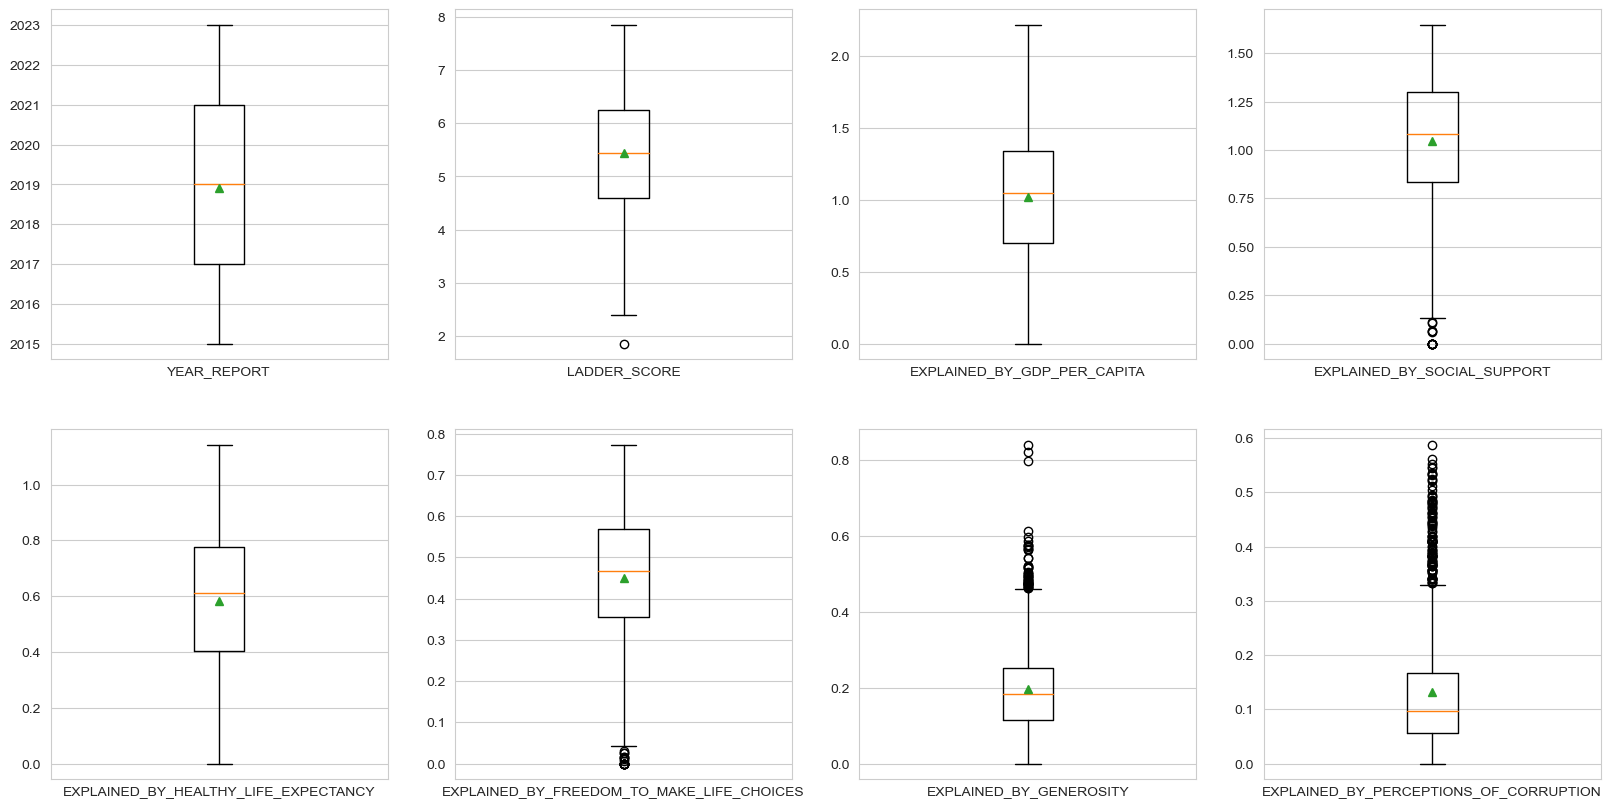

In [18]:
# Plotting the range and distribution of values of each variable in the data set.
pl.close("all")
pl.figure(figsize=(20, 10))
for i in range(len(numerical_variables)):
    pl.subplot(2, 4, i+1)
    pl.boxplot(x=data_table[numerical_variables[i]], showmeans=True)
    pl.xticks([])
    pl.xlabel(numerical_variables[i])

# COMMENT: The graphs indicate that the variables EXPLAINED_BY_GDP_PER_CAPITA and EXPLAINED_BY_SOCIAL_SUPPORT present 
# high values compared to the others, indicating that theses variables can influence in the happiness level
# of the population of a country.

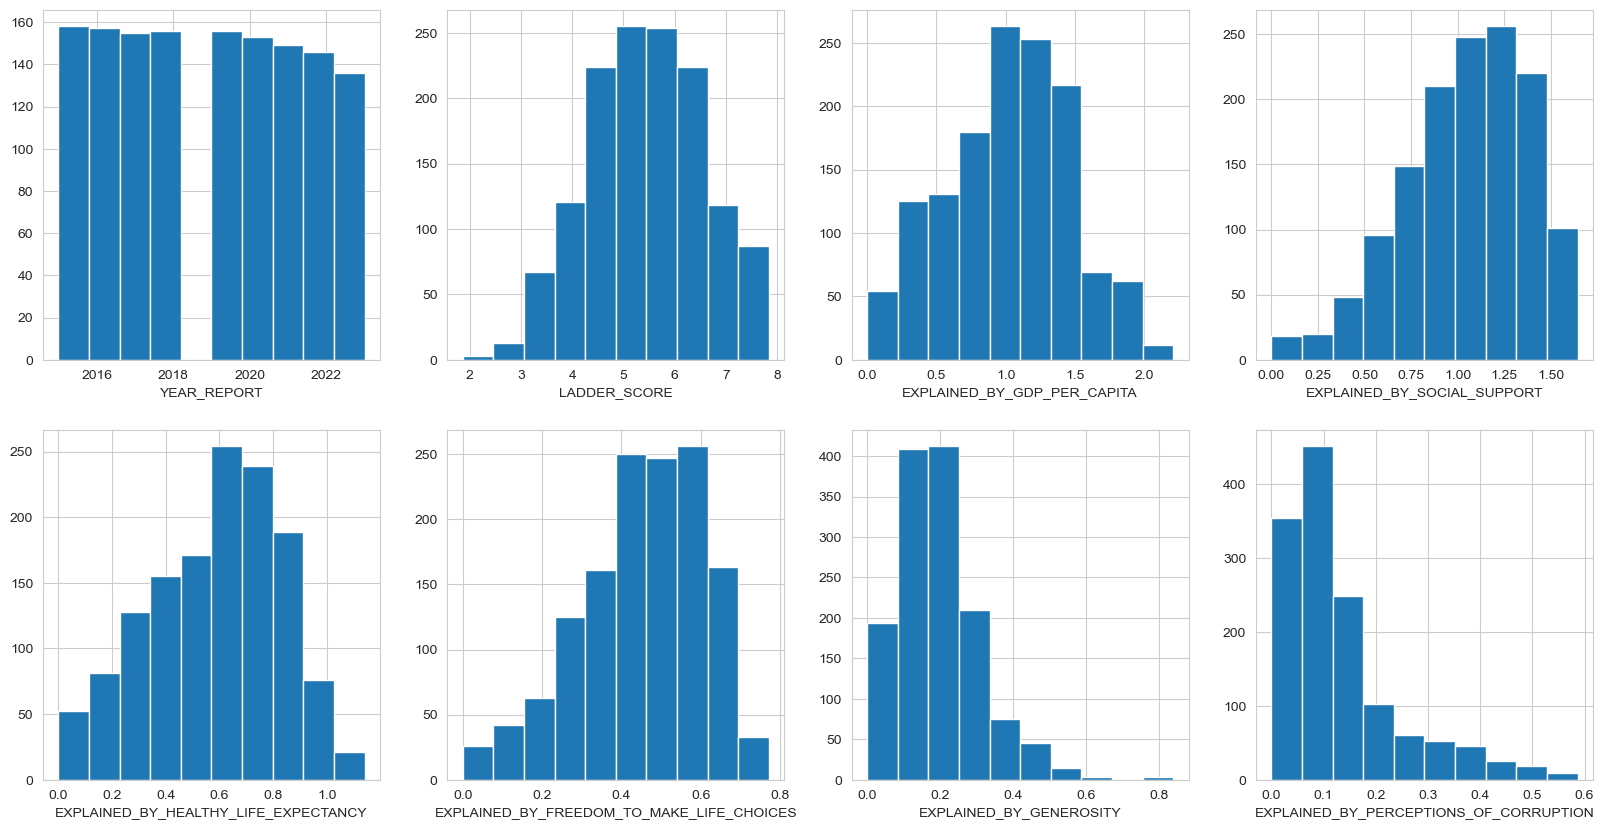

In [19]:
# Plotting the distribution of the values of each variable in the data set.
pl.close("all")
pl.figure(figsize=(20, 10))
for i in range(len(numerical_variables)):
    pl.subplot(2, 4, i+1)
    pl.hist(x=data_table[numerical_variables[i]])
    pl.xlabel(numerical_variables[i])

# COMMENT: The graphs demonstrate that the output variable presents a distribution of values close to the
# normal distribution. This indicates that the population of the countries differs in terms of their level of happiness,
# but there is a tendency between people.
# Once again, the graphs demonstrate that the variables EXPLAINED_BY_GDP_PER_CAPITA and EXPLAINED_BY_SOCIAL_SUPPORT
# present high values in relation to the others.
# The graphs also demonstrate that each variable has a distribution of values, with some of them,
# such as EXPLAINED_BY_GENEROSITY and EXPLAINED_BY_PERCEPTIONS_OF_CORRUPTION, having a greater occurrence
# of the lowest values, indicating that such country factors do not impact the population happiness in most cases.

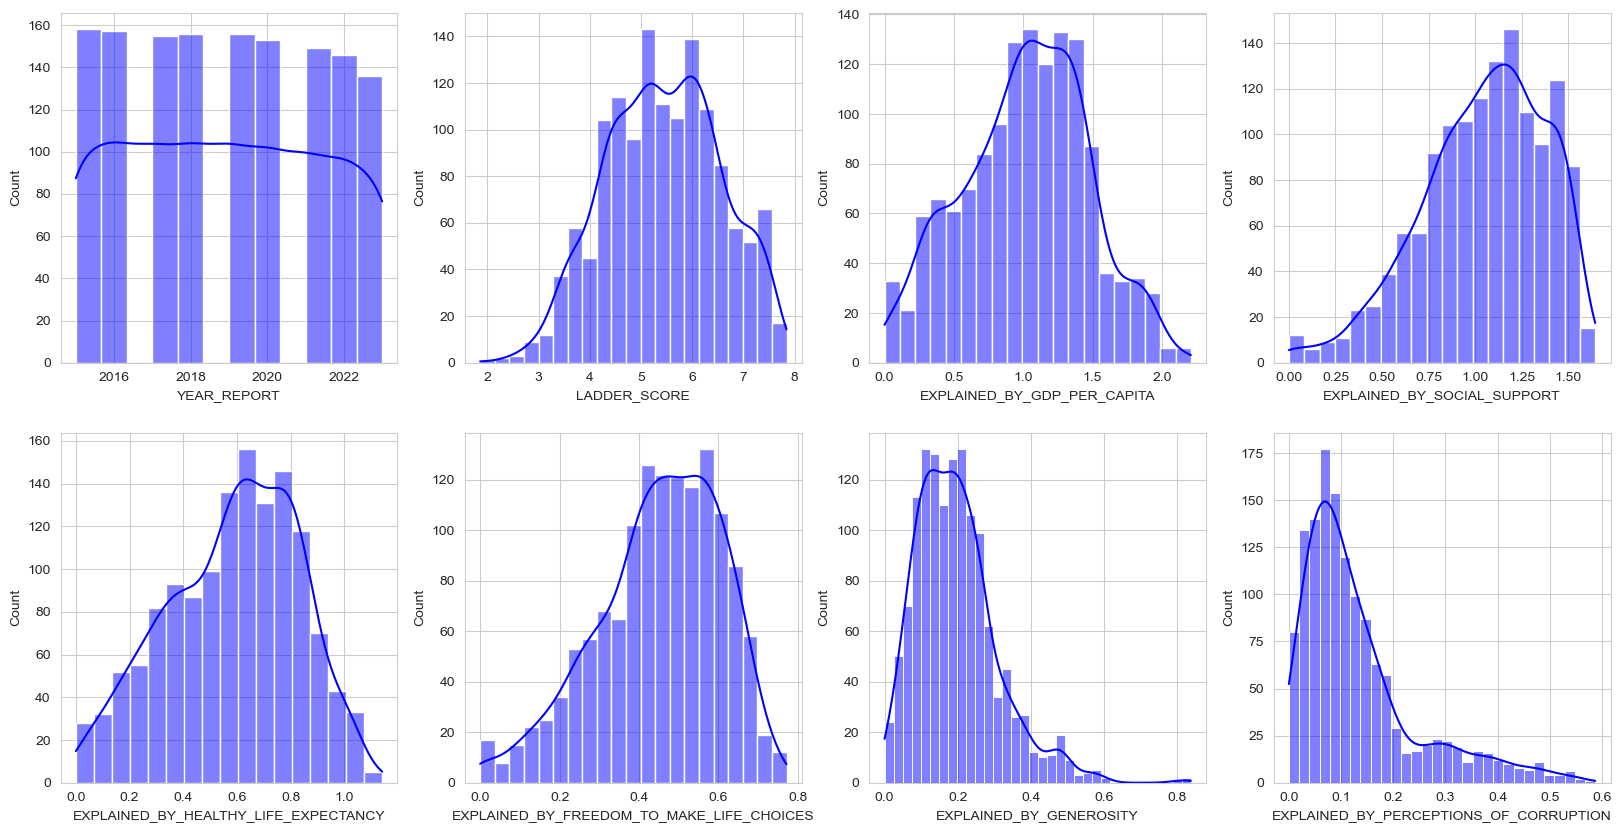

In [20]:
# Plotting the distribution of the values of each variable in the data set with kde curve.
pl.close("all")
pl.figure(figsize=(20, 10))
for i in range(len(numerical_variables)):
    pl.subplot(2, 4, i+1)
    sns.histplot(data=data_table, x=numerical_variables[i], kde=True, color="blue")
    pl.xlabel(numerical_variables[i])

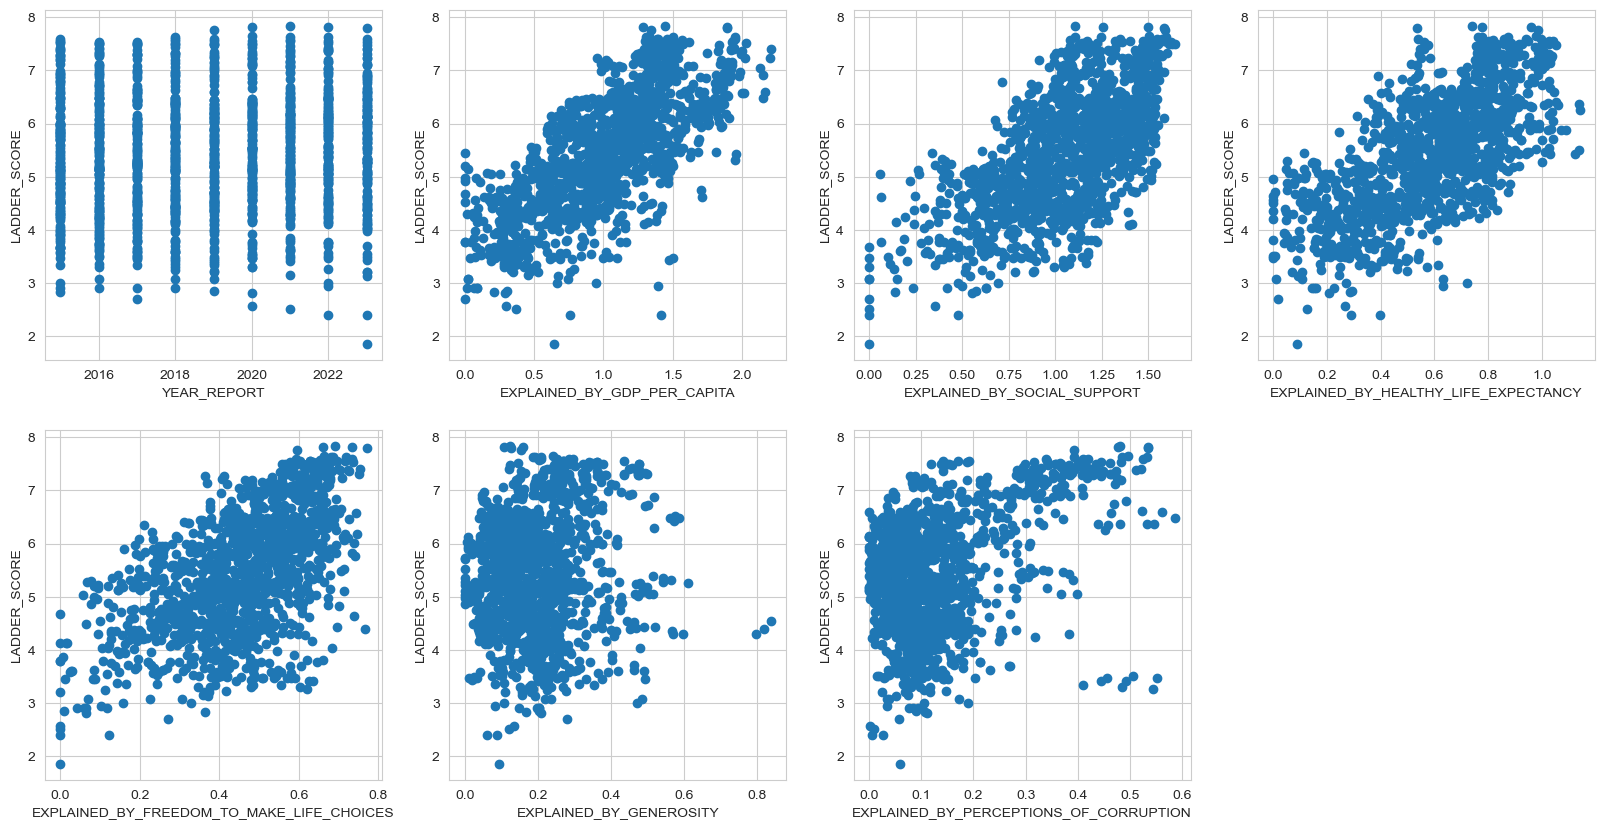

In [21]:
# Plotting the relationship of each independent variable (country factors) with the output variable (happiness level).
pl.close("all")
pl.figure(figsize=(20, 10))
i_plot = 1
for i in range(len(numerical_variables)):
    if numerical_variables[i] != target_variable:
        pl.subplot(2, 4, i_plot)
        i_plot += 1
        pl.scatter(x=data_table[numerical_variables[i]], y=data_table[target_variable])
        pl.xlabel(numerical_variables[i])
        pl.ylabel(target_variable)

# COMMENT: The graphs demonstrate that four (EXPLAINED_BY_GDP_PER_CAPITA, EXPLAINED_BY_SOCIAL_SUPPORT,
# EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY and EXPLAINED_BY_FREEDOM_TO_MAKE_LIFE_CHOICES) of the six 
# variables (country factors) present positive relationship with the happiness level in general,
# each one of them with its own level of impact, the most relevant being the variables
# EXPLAINED_BY_GDP_PER_CAPITA, EXPLAINED_BY_SOCIAL_SUPPORT, EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY.

In [22]:
# Producing and presenting the covariance matrix between the variables in the dataset.
covariance_matrix = data_table.cov()
covariance_matrix

,YEAR_REPORT,LADDER_SCORE,EXPLAINED_BY_GDP_PER_CAPITA,EXPLAINED_BY_SOCIAL_SUPPORT,EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY,EXPLAINED_BY_FREEDOM_TO_MAKE_LIFE_CHOICES,EXPLAINED_BY_GENEROSITY,EXPLAINED_BY_PERCEPTIONS_OF_CORRUPTION
YEAR_REPORT,6.551253,0.178750,0.380346,0.016134,-0.094375,0.115783,-0.084028,0.010672
LADDER_SCORE,0.178750,1.250433,0.366772,0.240739,0.187126,0.100212,0.010456,0.052240
EXPLAINED_BY_GDP_PER_CAPITA,0.380346,0.366772,0.205286,0.078767,0.062843,0.031405,-0.007882,0.017223
EXPLAINED_BY_SOCIAL_SUPPORT,0.016134,0.240739,0.078767,0.109692,0.045620,0.018967,-0.000208,0.005514
EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY,-0.094375,0.187126,0.062843,0.045620,0.060106,0.010057,0.000726,0.007060
EXPLAINED_BY_FREEDOM_TO_MAKE_LIFE_CHOICES,0.115783,0.100212,0.031405,0.018967,0.010057,0.024597,0.002799,0.007657
EXPLAINED_BY_GENEROSITY,-0.084028,0.010456,-0.007882,-0.000208,0.000726,0.002799,0.012840,0.002856
EXPLAINED_BY_PERCEPTIONS_OF_CORRUPTION,0.010672,0.052240,0.017223,0.005514,0.007060,0.007657,0.002856,0.012667


<AxesSubplot:>

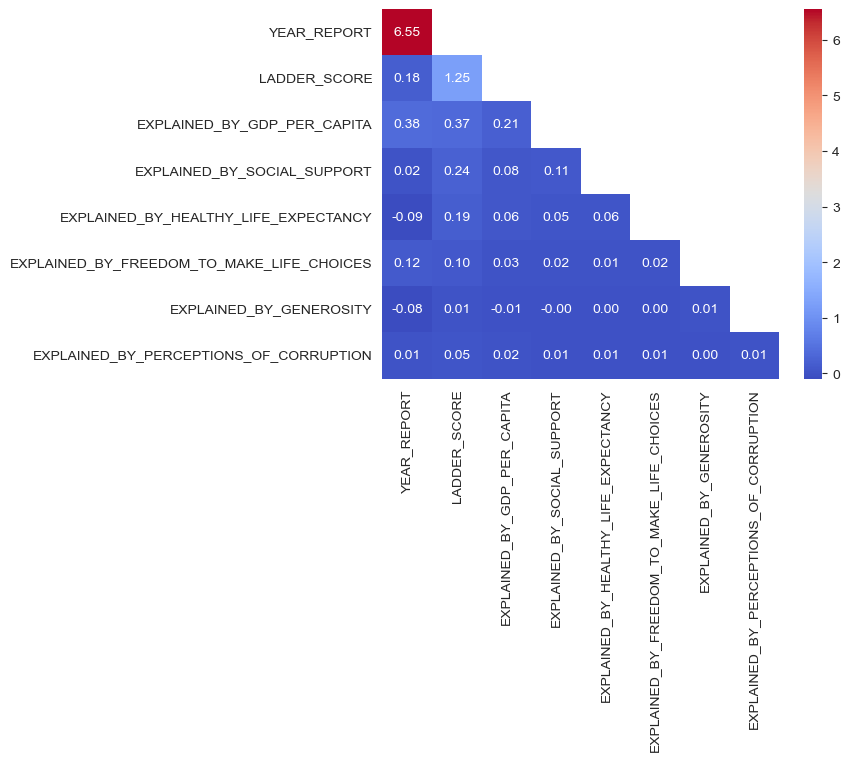

In [23]:
# Plotting the covariance matrix between the variables in the dataset.
pl.close("all")
pl.figure()
mask = np.ones_like(a=covariance_matrix, dtype=bool)
mask = np.triu(m=mask, k=1)
sns.heatmap(data=covariance_matrix, cmap="coolwarm", annot=True, fmt=".2f", mask=mask)

# COMMENT: The graphs once again demonstrate that the variables EXPLAINED_BY_GDP_PER_CAPITA and
# EXPLAINED_BY_SOCIAL_SUPPORT are those that most impact in the happiness level. This analysis also
# highlights the relevance of the factor EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY.

In [24]:
# Producing and presenting the correlation matrix between the variables in the dataset.
correlation_matrix = data_table.corr()
correlation_matrix

,YEAR_REPORT,LADDER_SCORE,EXPLAINED_BY_GDP_PER_CAPITA,EXPLAINED_BY_SOCIAL_SUPPORT,EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY,EXPLAINED_BY_FREEDOM_TO_MAKE_LIFE_CHOICES,EXPLAINED_BY_GENEROSITY,EXPLAINED_BY_PERCEPTIONS_OF_CORRUPTION
YEAR_REPORT,1.000000,0.062453,0.327972,0.019032,-0.150395,0.288427,-0.289721,0.037046
LADDER_SCORE,0.062453,1.000000,0.723913,0.650023,0.682567,0.571408,0.082520,0.415079
EXPLAINED_BY_GDP_PER_CAPITA,0.327972,0.723913,1.000000,0.524902,0.565740,0.441947,-0.153517,0.337744
EXPLAINED_BY_SOCIAL_SUPPORT,0.019032,0.650023,0.524902,1.000000,0.561832,0.365153,-0.005541,0.147911
EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY,-0.150395,0.682567,0.565740,0.561832,1.000000,0.261549,0.026128,0.255869
EXPLAINED_BY_FREEDOM_TO_MAKE_LIFE_CHOICES,0.288427,0.571408,0.441947,0.365153,0.261549,1.000000,0.157498,0.433806
EXPLAINED_BY_GENEROSITY,-0.289721,0.082520,-0.153517,-0.005541,0.026128,0.157498,1.000000,0.223964
EXPLAINED_BY_PERCEPTIONS_OF_CORRUPTION,0.037046,0.415079,0.337744,0.147911,0.255869,0.433806,0.223964,1.000000


<AxesSubplot:>

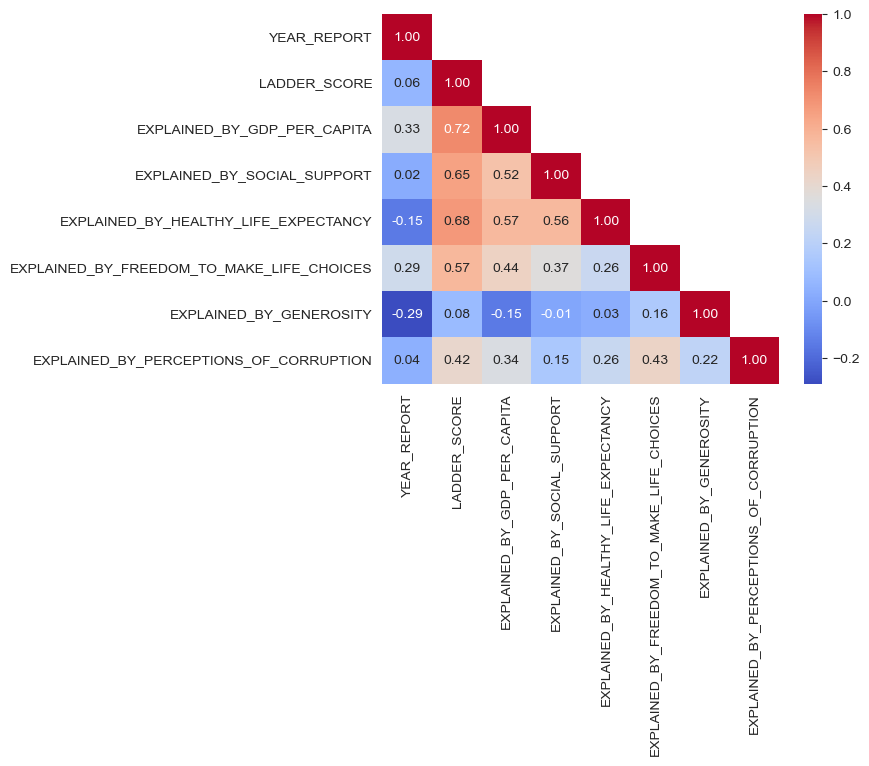

In [25]:
# Plotting the correlation matrix between the variables in the dataset.
pl.close("all")
pl.figure()
mask = np.ones_like(a=correlation_matrix, dtype=bool)
mask = np.triu(m=mask, k=1)
sns.heatmap(data=correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", mask=mask)

# COMMENT: The graphs once again demonstrate that the variables EXPLAINED_BY_GDP_PER_CAPITA and
# EXPLAINED_BY_SOCIAL_SUPPORT, mainly EXPLAINED_BY_GDP_PER_CAPITA are those that most impact in the happiness level.
# This analysis also highlights the relevance of the factor EXPLAINED_BY_HEALTHY_LIFE_EXPECTANCY,
# slightly more relevant than the factor EXPLAINED_BY_SOCIAL_SUPPORT, highlighted most frequently in previous analyzes.